In [5]:
# PROJECT: IMPROVING NIGERIA'S CAESAREAN SECTION SERVICES: THE DATA SCIENCE ROLE

#    @ Author: ODERINDE, Taiwo Emmanuel

In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [10]:
# source file
df =pd.read_csv('csdataset.csv', index_col=0)
df

,facility_name,facility_type_display,maternal_health_delivery_services,emergency_transport,skilled_birth_attendant,num_chews_fulltime,phcn_electricity,c_section_yn,child_health_measles_immun_calc,num_nurses_fulltime,...,vaccines_fridge_freezer,antenatal_care_yn,family_planning_yn,malaria_treatment_artemisinin,sector,gps,survey_id,unique_lga,latitude,longitude
S/N,,,,,,,,,,,,,,,,,,,,,
1,HEALTH POST KAGBANG,Health Post,1.0,1,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,health,6.54340807 9.08470312 218.8000030517578 5.0,451a0efb-5fa6-4bad-93cd-7cf19eb50833,cross_river_obudu,6.543408,9.084703
2,Alhari Clinic,Primary Health Centre (PHC),1.0,1,1.0,4.0,1.0,0.0,1.0,1.0,...,1.0,1.0,0.0,1.0,health,9.00720861 7.67780798 432.8999938964844 5.0,5ddb68d6-02d2-44de-9df3-ebc840a1da42,nasarawa_karu,9.007209,7.677808
3,Primary health centre umukuru okehi,Basic Health Centre / Primary Health Clinic,1.0,1,1.0,2.0,1.0,1.0,1.0,4.0,...,1.0,1.0,1.0,1.0,health,5.1297 7.1592 73.3 5,2173b656-14eb-400d-9eef-76830379b065,rivers_etche,5.129700,7.159200
4,PHC EHOM CENTRAL,Primary Health Centre (PHC),1.0,0,0.0,2.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,1.0,health,5.4633 8.1464 117.8 5,963abf9d-5a72-4b35-811e-9c1830adc88b,cross_river_biase,5.463300,8.146400
5,Health post,Health Post,1.0,0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,1.0,health,5.504 8.0251 52.4 5,9d09aaac-578c-4a48-a054-dee678a05422,cross_river_biase,5.504000,8.025100
6,Tula Medical Centre,Health Post,1.0,1,1.0,0.0,0.0,1.0,0.0,2.0,...,0.0,1.0,1.0,1.0,health,5.0762 5.8715 39.6 5,274e2e1b-c47c-4da5-97ac-8aefd6b18813,bayelsa_ekeremor,5.076200,5.871500
7,HEALTH POST OKIRO,Health Post,0.0,0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,1.0,1.0,health,6.4475 9.0491 190.1 5,6d838d04-02ff-48e2-b15b-4c48d0cf66af,cross_river_obudu,6.447500,9.049100
8,Westend Hospital,Specialist Hospital,1.0,1,1.0,1.0,1.0,1.0,1.0,6.0,...,1.0,1.0,1.0,1.0,health,5.546 5.7611 37.4 5,daab030a-06f1-4d3a-ae52-25926e7d418b,delta_warri_south,5.546000,5.761100
9,Lily Hospitals Ltd,Specialist Hospital,1.0,1,1.0,4.0,1.0,1.0,1.0,NaN,...,1.0,1.0,1.0,1.0,health,5.5258 5.7651 37.3 5,fa30b24a-a7a0-416c-8778-95b1482d222f,delta_warri_south,5.525800,5.765100


In [1]:
# Opening up our dataset
df.describe().transpose()

NameError: name 'df' is not defined

In [14]:
col = df.columns
print(col)

Index(['facility_name', 'facility_type_display',
       'maternal_health_delivery_services', 'emergency_transport',
       'skilled_birth_attendant', 'num_chews_fulltime', 'phcn_electricity',
       'c_section_yn', 'child_health_measles_immun_calc',
       'num_nurses_fulltime', 'num_nursemidwives_fulltime',
       'num_doctors_fulltime', 'community', 'ward', 'management',
       'improved_water_supply', 'improved_sanitation',
       'vaccines_fridge_freezer', 'antenatal_care_yn', 'family_planning_yn',
       'malaria_treatment_artemisinin', 'sector', 'gps', 'survey_id',
       'unique_lga', 'latitude', 'longitude'],
      dtype='object')


In [23]:
y = df.management
list = ['survey_id','improved_water_supply', 'improved_sanitation',
       'vaccines_fridge_freezer','sector']
x = df.drop(list,axis = 1 )
x.head()

,facility_name,facility_type_display,maternal_health_delivery_services,emergency_transport,skilled_birth_attendant,num_chews_fulltime,phcn_electricity,c_section_yn,child_health_measles_immun_calc,num_nurses_fulltime,...,community,ward,management,antenatal_care_yn,family_planning_yn,malaria_treatment_artemisinin,gps,unique_lga,latitude,longitude
S/N,,,,,,,,,,,,,,,,,,,,,
1,HEALTH POST KAGBANG,Health Post,1.0,1,0.0,1.0,1.0,0.0,1.0,0.0,...,KAGBANG,UKPE,public,1.0,0.0,1.0,6.54340807 9.08470312 218.8000030517578 5.0,cross_river_obudu,6.543408,9.084703
2,Alhari Clinic,Primary Health Centre (PHC),1.0,1,1.0,4.0,1.0,0.0,1.0,1.0,...,Masaka,Karu,private,1.0,0.0,1.0,9.00720861 7.67780798 432.8999938964844 5.0,nasarawa_karu,9.007209,7.677808
3,Primary health centre umukuru okehi,Basic Health Centre / Primary Health Clinic,1.0,1,1.0,2.0,1.0,1.0,1.0,4.0,...,Umukuru,Okehi,public,1.0,1.0,1.0,5.1297 7.1592 73.3 5,rivers_etche,5.129700,7.159200
4,PHC EHOM CENTRAL,Primary Health Centre (PHC),1.0,0,0.0,2.0,0.0,0.0,1.0,0.0,...,Ehom central,Ehom,public,1.0,1.0,1.0,5.4633 8.1464 117.8 5,cross_river_biase,5.463300,8.146400
5,Health post,Health Post,1.0,0,0.0,0.0,0.0,0.0,1.0,0.0,...,Ufut,Umon north,public,1.0,1.0,1.0,5.504 8.0251 52.4 5,cross_river_biase,5.504000,8.025100


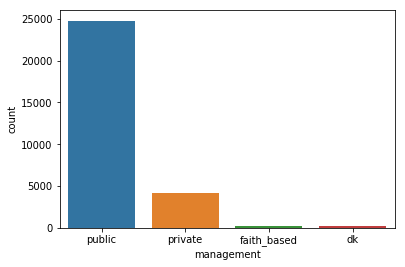

In [28]:
ax = sns.countplot(y,label="Count")       # M = 212, B = 357
##print('Not offering CS: ',0)
#print('Offering CS : ',1)

In [29]:
x.describe()

,maternal_health_delivery_services,emergency_transport,skilled_birth_attendant,num_chews_fulltime,phcn_electricity,c_section_yn,child_health_measles_immun_calc,num_nurses_fulltime,num_nursemidwives_fulltime,num_doctors_fulltime,antenatal_care_yn,family_planning_yn,malaria_treatment_artemisinin,latitude,longitude
count,33451.000000,34139.000000,33255.000000,33705.000000,29781.000000,33578.000000,29351.000000,31643.000000,33166.00000,31974.000000,33473.000000,33385.000000,33476.000000,34139.000000,34139.000000
mean,0.625392,0.315416,0.404601,2.076814,0.402068,0.156233,0.732582,0.954366,1.00196,0.589260,0.730171,0.581549,0.780948,8.588811,7.239061
std,0.484029,0.464688,0.490822,3.171834,0.490324,0.363082,0.442620,5.505466,5.78344,4.550893,0.443878,0.493312,0.413610,2.414159,2.386462
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,4.281809,2.707818
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,6.596869,5.443072
50%,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,1.000000,1.000000,1.000000,8.031827,7.286000
75%,1.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,10.489125,8.589357
max,1.000000,1.000000,1.000000,80.000000,1.000000,1.000000,1.000000,513.000000,431.00000,378.000000,1.000000,1.000000,1.000000,13.864973,14.636396


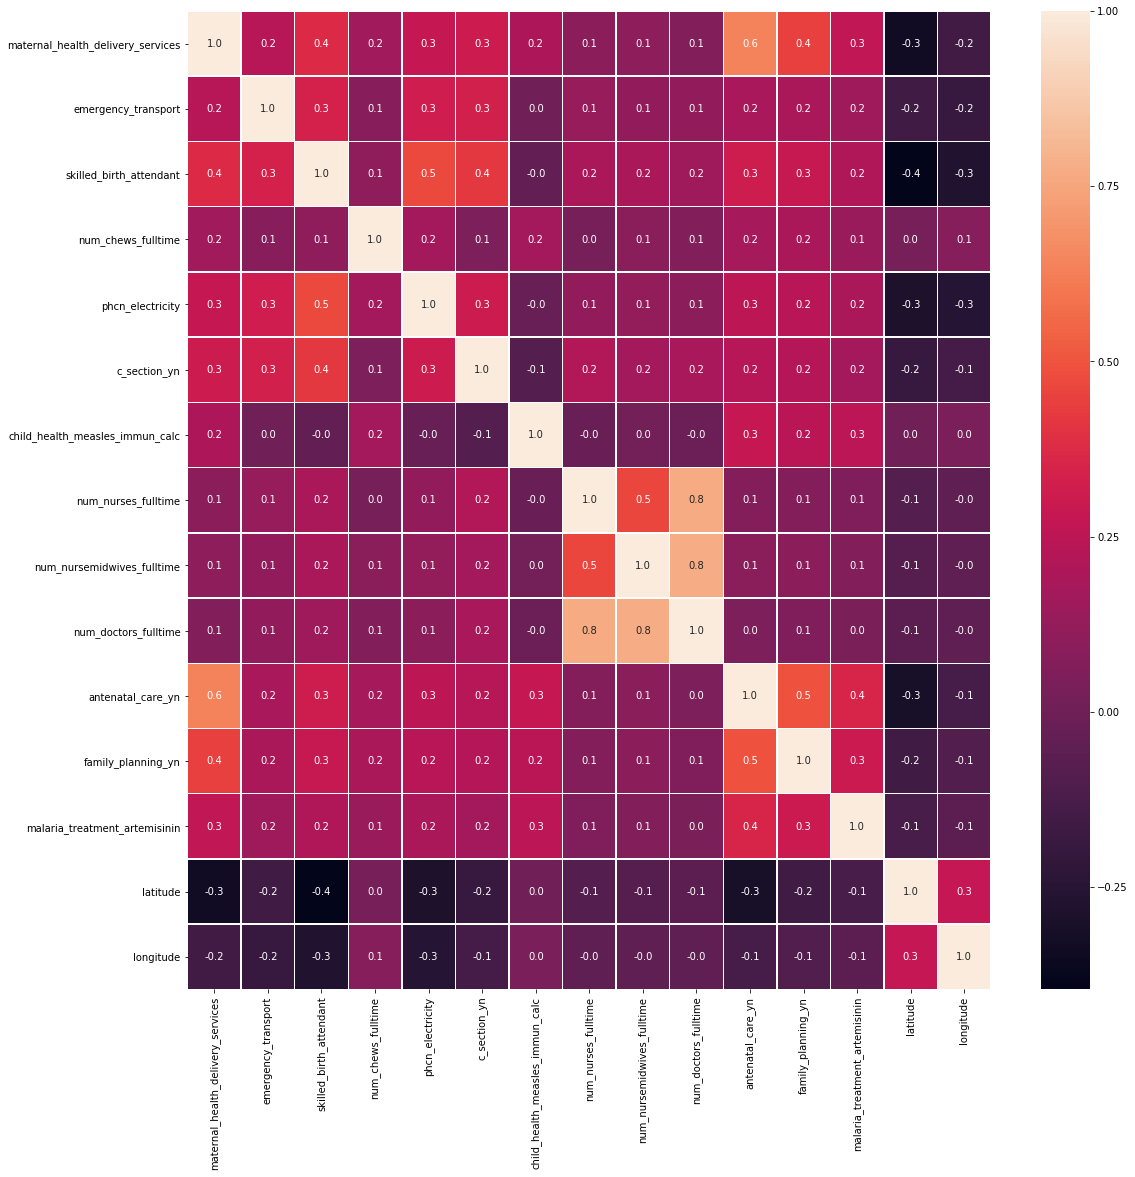

In [30]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34139 entries, 1 to 34139
Data columns (total 27 columns):
facility_name                        33526 non-null object
facility_type_display                34024 non-null object
maternal_health_delivery_services    33451 non-null float64
emergency_transport                  34139 non-null int64
skilled_birth_attendant              33255 non-null float64
num_chews_fulltime                   33705 non-null float64
phcn_electricity                     29781 non-null float64
c_section_yn                         33578 non-null float64
child_health_measles_immun_calc      29351 non-null float64
num_nurses_fulltime                  31643 non-null float64
num_nursemidwives_fulltime           33166 non-null float64
num_doctors_fulltime                 31974 non-null float64
community                            34036 non-null object
ward                                 33936 non-null object
management                           29385 non-null objec

In [11]:
# Ckeck if there are null values or NA in this column

df.isnull().values.any()

True

In [12]:
# This is the total number of null values in our Dataset.

df.isnull().sum()

facility_name                         613
facility_type_display                 115
maternal_health_delivery_services     688
emergency_transport                     0
skilled_birth_attendant               884
num_chews_fulltime                    434
phcn_electricity                     4358
c_section_yn                          561
child_health_measles_immun_calc      4788
num_nurses_fulltime                  2496
num_nursemidwives_fulltime            973
num_doctors_fulltime                 2165
community                             103
ward                                  203
management                           4754
improved_water_supply                4424
improved_sanitation                    68
vaccines_fridge_freezer              4854
antenatal_care_yn                     666
family_planning_yn                    754
malaria_treatment_artemisinin         663
sector                                  0
gps                                     0
survey_id                         

In [13]:
# Feature Selection - Dropping some columns

df.drop('facility_type_display', axis=1, inplace=True)
df.drop('child_health_measles_immun_calc', axis=1, inplace=True)
df.drop('community', axis=1, inplace=True)
df.drop('ward', axis=1, inplace=True)
df.drop('improved_water_supply', axis=1, inplace=True)
df.drop('improved_sanitation', axis=1, inplace=True)
df.drop('vaccines_fridge_freezer', axis=1, inplace=True)
df.drop('antenatal_care_yn', axis=1, inplace=True)
df.drop('family_planning_yn', axis=1, inplace=True)
df.drop('malaria_treatment_artemisinin', axis=1, inplace=True)
df.drop('sector', axis=1, inplace=True)
df.drop('gps', axis=1, inplace=True)
df.drop('survey_id', axis=1, inplace=True)

df.isnull().sum()

facility_name                         613
maternal_health_delivery_services     688
emergency_transport                     0
skilled_birth_attendant               884
num_chews_fulltime                    434
phcn_electricity                     4358
c_section_yn                          561
num_nurses_fulltime                  2496
num_nursemidwives_fulltime            973
num_doctors_fulltime                 2165
management                           4754
unique_lga                              0
latitude                                0
longitude                               0
dtype: int64

In [14]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
maternal_health_delivery_services,33451.0,0.625392,0.484029,0.000000,0.000000,1.000000,1.000000,1.000000
emergency_transport,34139.0,0.315416,0.464688,0.000000,0.000000,0.000000,1.000000,1.000000
skilled_birth_attendant,33255.0,0.404601,0.490822,0.000000,0.000000,0.000000,1.000000,1.000000
num_chews_fulltime,33705.0,2.076814,3.171834,0.000000,0.000000,1.000000,3.000000,80.000000
phcn_electricity,29781.0,0.402068,0.490324,0.000000,0.000000,0.000000,1.000000,1.000000
c_section_yn,33578.0,0.156233,0.363082,0.000000,0.000000,0.000000,0.000000,1.000000
num_nurses_fulltime,31643.0,0.954366,5.505466,0.000000,0.000000,0.000000,1.000000,513.000000
num_nursemidwives_fulltime,33166.0,1.001960,5.783440,0.000000,0.000000,0.000000,1.000000,431.000000
num_doctors_fulltime,31974.0,0.589260,4.550893,0.000000,0.000000,0.000000,1.000000,378.000000
latitude,34139.0,8.588811,2.414159,4.281809,6.596869,8.031827,10.489125,13.864973


In [15]:
# Now we can start Data Analysis, but we need to know the right data for answering our question;
# hence, we need to decide what to measure

# For example, we can check for relationship in our Data,

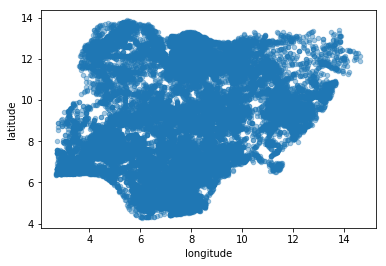

In [16]:
# # Relationship between longitude and latitude should inform us about the area where the survey was conducted
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4)
plt.show()

ValueError: max must be larger than min in range parameter.

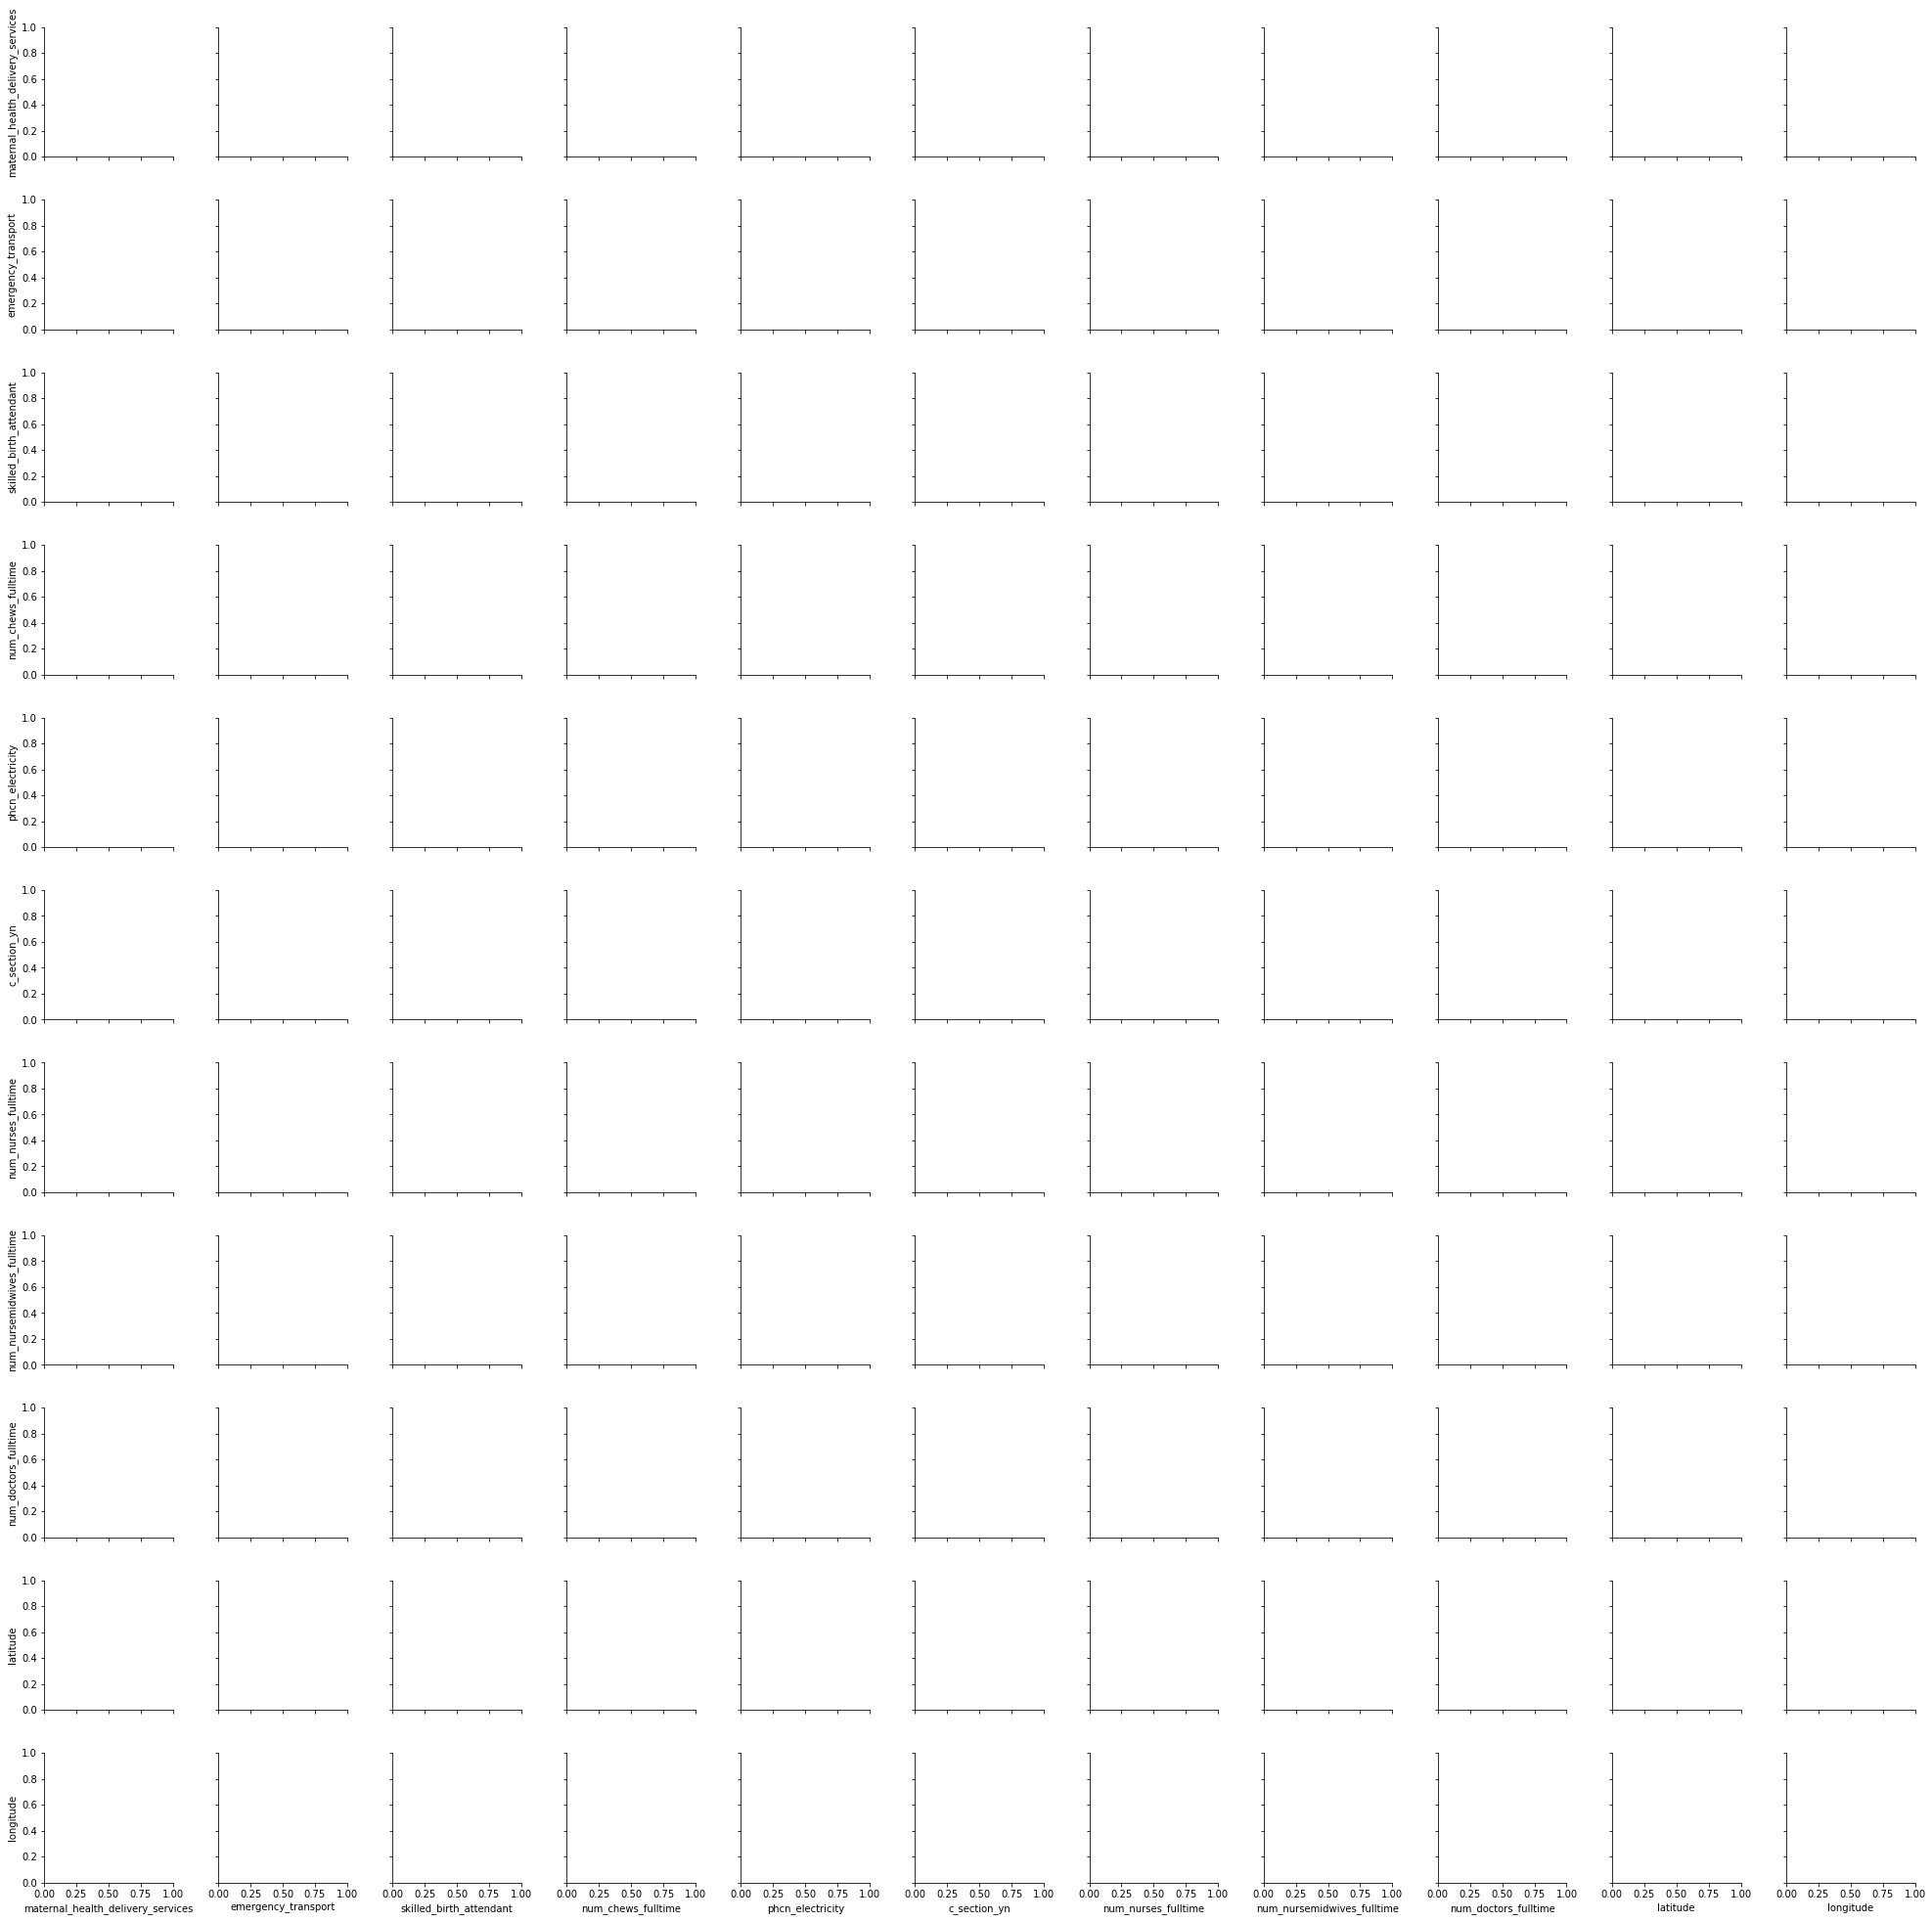

In [17]:
# Now, comparing the areas where Maternal health Delivery 
#Services is being conducted to C-Section rendering Hospitals
sns.pairplot(df)

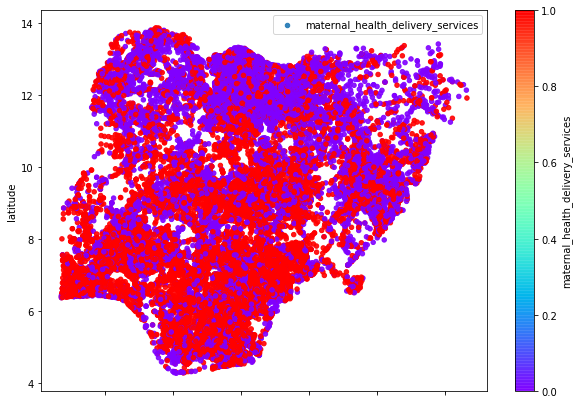

In [18]:
df.plot(kind="scatter", x="longitude", y="latitude",
    label="maternal_health_delivery_services",
    c="maternal_health_delivery_services", cmap=plt.get_cmap("rainbow"),
    colorbar=True, alpha=0.9, figsize=(10,7),
)
plt.legend()
plt.show()

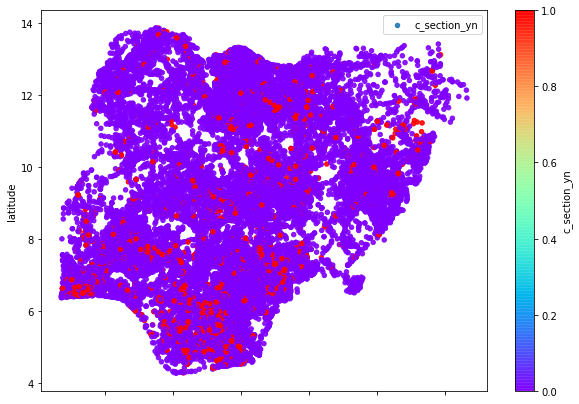

In [19]:
df.plot(kind="scatter", x="longitude", y="latitude",
    label="c_section_yn",
    c="c_section_yn", cmap=plt.get_cmap("rainbow"),
    colorbar=True, alpha=0.9, figsize=(10,7),
)
plt.legend()
plt.show()

In [20]:
# This code calculates the distance between two points using longitude and latitude
from math import sin, cos, sqrt, atan2, radians

# approximate radius of earth in km
R = 6373.0

lat1 = radians( 5.076200 )
lon1 = radians(5.871500)
lat2 = radians(6.447500)
lon2 = radians(9.049100)

dlon = lon2 - lon1
dlat = lat2 - lat1

a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
c = 2 * atan2(sqrt(a), sqrt(1 - a))

distance = R * c

#print("Result:", distance)
print("Should be:", distance, "km")

Should be: 383.3045184252869 km


In [21]:
df.count()

facility_name                        33526
maternal_health_delivery_services    33451
emergency_transport                  34139
skilled_birth_attendant              33255
num_chews_fulltime                   33705
phcn_electricity                     29781
c_section_yn                         33578
num_nurses_fulltime                  31643
num_nursemidwives_fulltime           33166
num_doctors_fulltime                 31974
management                           29385
unique_lga                           34139
latitude                             34139
longitude                            34139
dtype: int64

In [22]:
# Total number of hospitals where C-Section column has a value
df['c_section_yn'].count()

33578

In [23]:
# This shows that only 5,246 Hospitals are rendering C-Section in Nigeria.
cs = df[df['c_section_yn']==1].count()
cs

facility_name                        5184
maternal_health_delivery_services    5245
emergency_transport                  5246
skilled_birth_attendant              4941
num_chews_fulltime                   5223
phcn_electricity                     3390
c_section_yn                         5246
num_nurses_fulltime                  4628
num_nursemidwives_fulltime           4863
num_doctors_fulltime                 4836
management                           3326
unique_lga                           5246
latitude                             5246
longitude                            5246
dtype: int64

In [24]:
mhd = df[df['maternal_health_delivery_services']==1].count()
mhd

facility_name                        20581
maternal_health_delivery_services    20920
emergency_transport                  20920
skilled_birth_attendant              20464
num_chews_fulltime                   20873
phcn_electricity                     17356
c_section_yn                         20916
num_nurses_fulltime                  19656
num_nursemidwives_fulltime           20384
num_doctors_fulltime                 19848
management                           17194
unique_lga                           20920
latitude                             20920
longitude                            20920
dtype: int64

In [25]:
# This shows that only 28,332 Hospitals are not rendering C-Section in Nigeria.
ncs = df[df['c_section_yn']==0].count()
ncs

facility_name                        27839
maternal_health_delivery_services    28201
emergency_transport                  28332
skilled_birth_attendant              28101
num_chews_fulltime                   28266
phcn_electricity                     25922
c_section_yn                         28332
num_nurses_fulltime                  26878
num_nursemidwives_fulltime           28092
num_doctors_fulltime                 26999
management                           25588
unique_lga                           28332
latitude                             28332
longitude                            28332
dtype: int64

In [26]:
nmhd = df[df['maternal_health_delivery_services']==0].count()
nmhd

facility_name                        12316
maternal_health_delivery_services    12531
emergency_transport                  12531
skilled_birth_attendant              12462
num_chews_fulltime                   12501
phcn_electricity                     11906
c_section_yn                         12530
num_nurses_fulltime                  11734
num_nursemidwives_fulltime           12454
num_doctors_fulltime                 11871
management                           11666
unique_lga                           12531
latitude                             12531
longitude                            12531
dtype: int64

In [27]:
data = {'MEDICAL SERVICES':['Maternal_health_delivery_services','c_section_yn'],
        'OFFERING':[20920,5246]}

OFFERING = DataFrame(data)


OFFERING

,MEDICAL SERVICES,OFFERING
0,Maternal_health_delivery_services,20920
1,c_section_yn,5246


In [28]:
data = {'MEDICAL SERVICES':['Maternal_health_delivery_services','c_section_yn'],
        'NOT_OFFERING':[12531,28332]}

NOT_OFFERING = DataFrame(data)


NOT_OFFERING

,MEDICAL SERVICES,NOT_OFFERING
0,Maternal_health_delivery_services,12531
1,c_section_yn,28332


In [29]:
compare= pd.merge(OFFERING,NOT_OFFERING,how='inner',on='MEDICAL SERVICES')
compare

,MEDICAL SERVICES,OFFERING,NOT_OFFERING
0,Maternal_health_delivery_services,20920,12531
1,c_section_yn,5246,28332


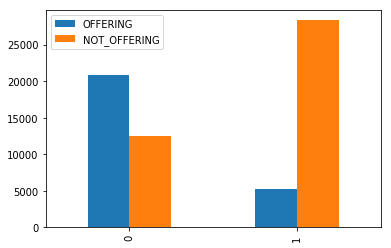

In [30]:
compare.plot.bar()

In [31]:
df['c_section_yn']

S/N
1        0.0
2        0.0
3        1.0
4        0.0
5        0.0
6        1.0
7        0.0
8        1.0
9        1.0
10       0.0
11       0.0
12       0.0
13       1.0
14       0.0
15       0.0
16       0.0
17       0.0
18       0.0
19       0.0
20       0.0
21       0.0
22       0.0
23       1.0
24       0.0
25       0.0
26       0.0
27       1.0
28       0.0
29       1.0
30       1.0
        ... 
34110    0.0
34111    0.0
34112    0.0
34113    0.0
34114    1.0
34115    0.0
34116    1.0
34117    0.0
34118    0.0
34119    1.0
34120    1.0
34121    0.0
34122    0.0
34123    0.0
34124    0.0
34125    0.0
34126    1.0
34127    0.0
34128    0.0
34129    1.0
34130    0.0
34131    0.0
34132    0.0
34133    0.0
34134    0.0
34135    0.0
34136    0.0
34137    0.0
34138    0.0
34139    0.0
Name: c_section_yn, Length: 34139, dtype: float64

In [32]:
df['c_section_yn']==1

S/N
1        False
2        False
3         True
4        False
5        False
6         True
7        False
8         True
9         True
10       False
11       False
12       False
13        True
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23        True
24       False
25       False
26       False
27        True
28       False
29        True
30        True
         ...  
34110    False
34111    False
34112    False
34113    False
34114     True
34115    False
34116     True
34117    False
34118    False
34119     True
34120     True
34121    False
34122    False
34123    False
34124    False
34125    False
34126     True
34127    False
34128    False
34129     True
34130    False
34131    False
34132    False
34133    False
34134    False
34135    False
34136    False
34137    False
34138    False
34139    False
Name: c_section_yn, Length: 34139, dtype: bool

In [33]:
df['longitude']

S/N
1         9.084703
2         7.677808
3         7.159200
4         8.146400
5         8.025100
6         5.871500
7         9.049100
8         5.761100
9         5.765100
10        8.594392
11        8.645408
12        7.143468
13        7.152892
14        8.150000
15        7.949500
16        7.888700
17        7.881900
18        7.192900
19       11.479900
20       11.215200
21       10.439100
22       10.357900
23       10.409400
24        7.333600
25       12.927500
26        7.345700
27        7.378700
28        7.377300
29        7.378100
30        3.400400
           ...    
34110     8.476839
34111     8.299116
34112     4.305026
34113     8.090837
34114     6.273146
34115     7.942749
34116     2.747347
34117     7.881616
34118    10.294565
34119     3.227280
34120     9.047919
34121     6.514803
34122     7.864920
34123     5.510382
34124     8.305747
34125     6.251201
34126     5.246036
34127     7.958248
34128     4.896557
34129     3.380369
34130     6.297897
34131   

In [34]:
df['latitude']

S/N
1         6.543408
2         9.007209
3         5.129700
4         5.463300
5         5.504000
6         5.076200
7         6.447500
8         5.546000
9         5.525800
10       10.285225
11       10.226657
12        4.871274
13        4.860706
14       12.346900
15       11.835400
16       12.673500
17       12.771700
18       12.883200
19        7.712400
20        9.962200
21       11.115100
22       10.887100
23       10.995300
24       12.852500
25       10.227800
26        5.108000
27        5.101200
28        5.079200
29        5.087600
30        6.599800
           ...    
34110    11.965042
34111     6.198613
34112    11.161217
34113     8.753133
34114     7.076058
34115     5.875662
34116     6.639494
34117    11.374690
34118    12.121333
34119     6.689941
34120    11.604095
34121    11.163366
34122    11.253917
34123    10.998684
34124    10.422822
34125     7.079494
34126     7.655903
34127     5.972250
34128    11.461058
34129     6.529215
34130    12.245899
34131   

In [35]:
# Lets pick two two points from our longitude and latitude column
from math import sin, cos, sqrt, atan2, radians

# approximate radius of earth in km
R = 6373.0

lat1 = radians( 5.076200 )
lon1 = radians(5.871500)
lat2 = radians(6.447500)
lon2 = radians(9.049100)

dlon = lon2 - lon1
dlat = lat2 - lat1

a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
c = 2 * atan2(sqrt(a), sqrt(1 - a))

distance = R * c

#print("Result:", distance)
print("Should be:", distance, "km")

Should be: 383.3045184252869 km


In [36]:
gps = {'longitude':df['longitude'],
        'latitude':df['latitude']}

location = DataFrame(gps)


location

,longitude,latitude
S/N,,
1,9.084703,6.543408
2,7.677808,9.007209
3,7.159200,5.129700
4,8.146400,5.463300
5,8.025100,5.504000
6,5.871500,5.076200
7,9.049100,6.447500
8,5.761100,5.546000
9,5.765100,5.525800


In [39]:
def lg(x):
    for i in range(len(df)):
        if df['unique_lga'][i] == x:
            return df['longitude'][i]

lg('cross_river_obudu')

KeyError: 0